In [1]:
!pip install -q tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 312kB/s 
     |████████████████████████████████| 3.0MB 35.0MB/s 
     |████████████████████████████████| 61kB 22.5MB/s 
     |████████████████████████████████| 419kB 47.4MB/s 


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = \
        fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# The images are 28 x 28 NumPy arrays
# Each image is mapped to a single label

# Store class label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
## Explore the data

train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

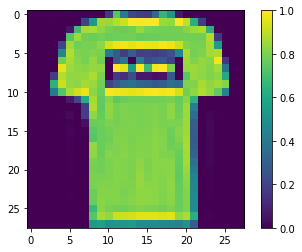

In [15]:
## Preprocess the data
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# values range 0 to 255
# Before feeding them to NN, divide values 255

train_images = train_images / 255.0
test_images = test_images / 255.0

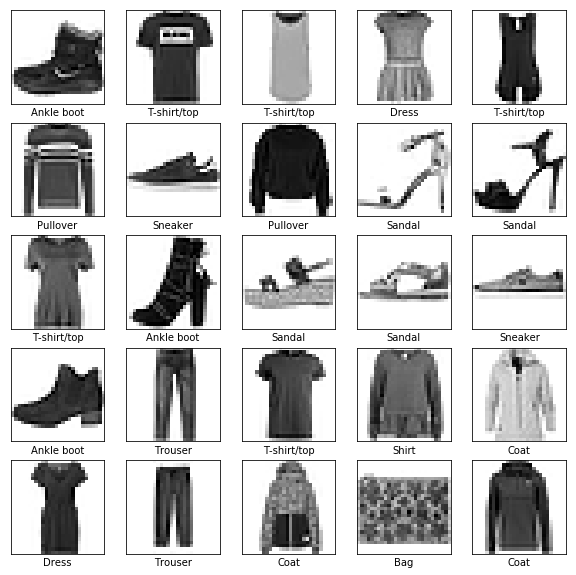

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Build NN require configuring layers of model,
# then compiling the model.

# Layers extract representations from the data fed into them

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model

# Loss function - This measures how accurate the model is during training.
# Optimizer - This is how the model is updated based on the data it sees and its loss function.
# Metrics - Used to monitor the training and testing steps
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Train the model

# Feed training data and labels to model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2821 - accuracy: 0.8957
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2686 - accuracy: 0.8994
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2572 - accuracy: 0.9044
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2494 - accuracy: 0.9072
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2396 - accuracy: 0.9106


In [32]:
# Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3458 - accuracy: 0.8805

Test accuracy: 0.8805


In [0]:
# Make predictions about some images
predictions = model.predict(test_images)

In [35]:
predictions[0]
# A prediction is an array of 10 numbers. They represent the model's "confidence"

array([3.6046004e-06, 3.2959899e-10, 8.7435843e-08, 6.4723942e-09,
       2.5791633e-07, 2.9305700e-02, 2.7159381e-06, 5.3564939e-03,
       1.0672181e-06, 9.6533006e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [0]:
# Graph this to look at the full set of 10 channels.
def plot_image(idx, predictions_array, true_label, img):
    predictions_array, true_label, img = \
            predictions_array[idx], true_label[idx], img[idx]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(
                class_names[predicted_label],
                100*np.max(predictions_array),
                class_names[true_label]),
                color=color)

In [0]:
def plot_value_array(idx, predictions_array, true_label):
    predictions_array, true_label = \
            predictions[idx], true_label[idx]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

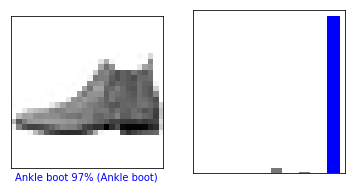

In [40]:
idx = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(idx, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(idx, predictions, test_labels)
plt.show()

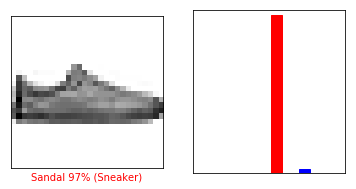

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

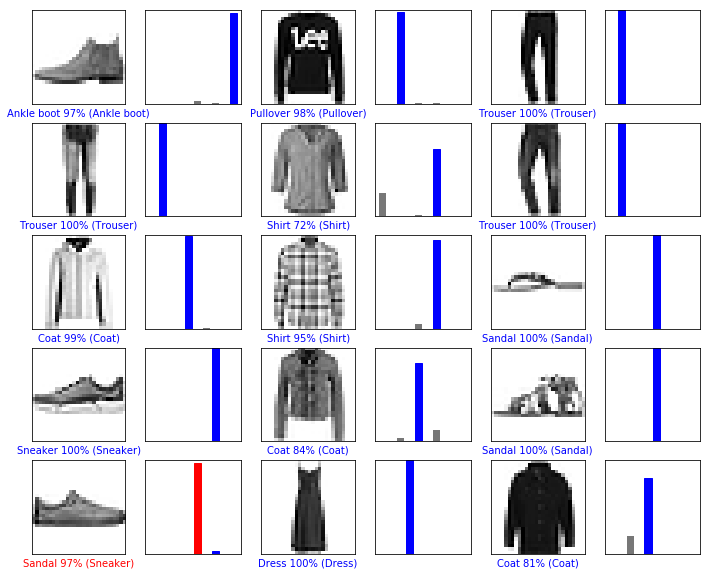

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # width, height
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
img = test_images[0]
print(img.shape)

(28, 28)


In [44]:
# keras models are optimized to make predictions on a batch, or collection
# Accordingly, even though we are using a single images, we need to add it to a list

img = (np.expand_dims(img, axis=0))
print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.6046004e-06 3.2959899e-10 8.7435673e-08 6.4723693e-09 2.5791633e-07
  2.9305728e-02 2.7159435e-06 5.3564939e-03 1.0672172e-06 9.6533006e-01]]


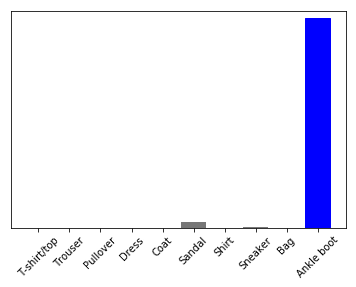

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [52]:
np.argmax(predictions_single[0])

9